In [7]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ndjson
import os
import random

In [54]:
def load_movies(name):
    df = pd.read_csv(name)
    df['keywords'] = df['keywords'].apply(json.loads)
    return df

def edit_names(keywords):
    return','.join([x['name'] for x in keywords]) 

#gets the category name from the ndjson file name
def get_category_from_filename(filename):
    i = filename.rfind('_')
    filename = filename[i+1:-7]
    return filename

df_categories = pd.read_csv('Categories_List.csv')
#print(df_categories)

movies = load_movies('MoviesList.csv')
tmdb_movies = movies.copy()
tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(edit_names)

df_categories = pd.read_csv('Categories_List.csv')# file with 345 category names
movies = load_movies('MoviesList.csv')
tmdb_movies = movies.copy()
tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(edit_names)

categories = df_categories['Categories']
print("Categories", type(categories))
categories_set = set()
categories_new_set = set()

for obj in tmdb_movies['keywords']:
    list = obj.split(',')
    categories_set.update(list)

# prints the matching categories: Download the files as required
for value in categories_set:
    # if categories.str.contains(value).any(): ->partial match
    if categories.eq(value).any():  # exact match string
        print(value)
        categories_new_set.add(value)

print("Total categories= ", len(categories_new_set))

Categories <class 'pandas.core.series.Series'>
snake
panda
whale
shark
cruise ship
penguin
zebra
tiger
spider
lion
ocean
monkey
giraffe
hammer
dragon
Total categories=  15


In [61]:
import csv

movies_df = load_movies('MoviesList.csv') #dataframe
categories_list = categories.tolist()

with open('MoviesListEdited.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    filewriter.writerow(['Name', 'Keywords'])
    for index, row in movies_df.iterrows():
        name = row["original_title"]
        keywords_list = [ sub['name'] for sub in row["keywords"] ] 
        new_list = set(keywords_list) & set(categories_list)
        filewriter.writerow([name, new_list])
        

{'whale'}
{'monkey', 'snake', 'tiger', 'panda'}
{'spider'}
{'hammer'}
{'dragon'}
{'shark'}
{'giraffe', 'penguin', 'zebra', 'lion'}
{'cruise ship', 'ocean'}
{'ocean', 'shark'}


In [37]:
doodle_dict = dict()
doodles_df = pd.DataFrame()
path = './Doodle_ndjson'  # directory to store all ndjson files

# reads each ndjson one by one from 'Doodle_ndjson' directory
for file in os.listdir(path):
    data_new = []
    data = []

    filename = get_category_from_filename(file)
    print("Reading file "+filename+".......")

    #going through all the files in Doodle_ndjson directory
    with open(path+"/"+file) as f:
        data = ndjson.load(f)  # loads an ndjson as list of doodle data # data[listitem] is <class 'dict'>
        for listitem in range(len(data)):
            # ignoring the items if 'recognized' is False
            if data[listitem]['recognized'] != False:
                data_new.append(data[listitem].get('drawing'))

    # Randomly selecting 100 items from a doodle data list
    data = random.sample(data_new, 100)
    # adding each data list to dictionary <key = category_name> <value = data>
    doodle_dict[filename] = data

print('Done!')
doodles_df = pd.DataFrame(doodle_dict)
doodles_df.head(3)
#print(doodle_dict['shark']) #to see format of one entry in dict
###################################
# There is no data for ship

Reading file shark.......
Reading file cruise ship.......
Reading file hammer.......
Reading file fish.......
Reading file dragon.......
Reading file giraffe.......
Reading file lion.......
Reading file zebra.......
Reading file penguin.......
Reading file monkey.......
Reading file panda.......
Reading file tiger.......
Reading file whale.......
Reading file spider.......
Reading file snake.......
Reading file ocean.......
Done!


,shark,cruise ship,hammer,fish,dragon,giraffe,lion,zebra,penguin,monkey,panda,tiger,whale,spider,snake,ocean
0,"[[[11, 37], [37, 54]], [[0, 32, 21, 29, 55], [...","[[[20, 46, 83, 114, 225, 243, 255, 236, 210, 1...","[[[129, 181, 219], [0, 30, 57]], [[127, 113, 1...","[[[83, 37, 26, 15, 1, 0, 9, 18, 53, 76, 100, 1...","[[[126, 131, 0, 10, 7], [73, 71, 70, 65, 78]],...","[[[39, 7, 0, 2, 8, 72, 85, 88, 84, 88, 108, 18...","[[[92, 91], [106, 119]], [[112, 111], [105, 12...","[[[179, 183, 192, 212, 248, 255, 255, 252, 242...","[[[28, 0, 20, 52], [27, 58, 59, 66]], [[18, 12...","[[[98, 115, 130, 128, 119, 107, 86, 80, 85, 96...","[[[24, 36, 68, 125, 181, 232, 249, 254, 255, 2...","[[[78, 57, 35], [48, 54, 69]], [[18, 32, 54, 1...","[[[171, 153, 106, 81, 57, 32, 18, 0], [64, 59,...","[[[127, 113, 102, 97, 97, 108, 121, 136, 164, ...","[[[10, 0, 1, 12, 22, 32, 48, 67, 89, 130, 152,...","[[[0, 19, 35, 64, 71, 95, 108, 132, 141, 145, ..."
1,"[[[123, 116, 49, 22, 8, 1, 0, 7, 26, 102, 161,...","[[[13, 8, 13, 21, 43, 173, 246, 252, 252], [25...","[[[117, 117, 120, 123, 128, 180, 182, 186, 186...","[[[198, 224, 250, 255, 254, 249, 239, 219, 204...","[[[150, 133, 117, 140, 129, 125, 146], [9, 10,...","[[[78, 64, 46, 23], [131, 134, 141, 140]], [[2...","[[[110, 99, 90, 74, 67, 67, 85, 96, 112, 119, ...","[[[58, 57, 42, 13, 2, 1, 12, 38], [43, 48, 61,...","[[[80, 81, 108], [227, 254, 251]], [[138, 136,...","[[[100, 112, 124, 139, 143, 143, 139, 132, 97,...","[[[149, 94, 75, 57, 26, 17, 7, 7, 31, 87, 121,...","[[[141, 117, 88, 53, 30, 9, 0, 1, 5, 24, 56, 9...","[[[161, 120, 96, 80, 63, 26, 1, 1, 16, 71, 107...","[[[102, 113, 132, 161, 180, 183, 177, 158, 142...","[[[24, 47, 64, 105, 130, 151, 172, 192, 209, 2...","[[[4, 62, 87, 165, 255], [75, 76, 81, 76, 79]]..."
2,"[[[98, 118, 130, 140], [23, 11, 0, 26]], [[5, ...","[[[27, 250, 255, 231, 226, 210, 175, 115, 96, ...","[[[52, 52, 60, 55, 52, 48, 48, 55, 51, 51, 41]...","[[[2, 11, 40, 52, 59, 94, 119, 125, 142, 160, ...","[[[171, 144, 101, 67, 44, 38, 37, 46, 68, 102,...","[[[23, 20, 27, 34, 35, 40, 37, 33, 26, 5, 1, 0...","[[[142, 145, 122, 88, 73, 63, 61, 61, 72, 102,...","[[[42, 101, 134, 171, 193, 244, 251, 255, 243,...","[[[91, 75, 61, 52, 51, 54, 69, 118, 147, 166, ...","[[[115, 88, 47, 33, 26, 35, 56, 81, 119, 153, ...","[[[25, 25], [38, 38]], [[25, 25, 31, 39, 52, 6...","[[[194, 195, 190, 175, 156, 106, 94, 74, 44, 2...","[[[45, 72, 124, 151, 215, 229, 249, 253, 255, ...","[[[105, 80, 59, 59, 74, 115, 147, 157, 157, 13...","[[[205, 164, 132, 116, 107, 96, 89, 83, 77, 55...","[[[0, 14, 72, 83, 170, 178, 189, 194, 239, 255..."


In [10]:
# print(doodle_dict["whale"]) #to see format of one entry in dict
#print(doodle_dict['whale'])

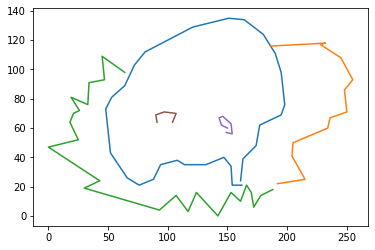

In [38]:
# multiple images of a category are stored under one column

x = doodles_df.iloc[8, 6]
x_length = len(x)

for i in range(x_length):
    plt.plot(x[i][0], x[i][1])
    
plt.show()

In [ ]:
# input data

# file = tf.train.string_input_producer("record.tfrecord")
# _, serialized_record = reader.read(file)

# for example in tf.python_io.tf_record_iterator(filename):
#     print(tf.train.Example.FromString(example))
    


# ndjson_file = 'full_simplified_airplane.ndjson'

# def read_ndjson_file(ndjson_file):
#     with open(ndjson_file) as f:
#         for line in f:
#           sample = json.loads(ndjson_line)
#           class_name = sample["word"]
#           drawing_array = sample["drawing"]
#           stroke_lengths = [len(stroke[0]) for stroke in drawing_array]
#           total_points = sum(stroke_lengths)
#           np_ink = np.zeros((total_points, 3), dtype=np.float32)
#           current_t = 0
#           for stroke in inkarray:
#                 for i in [0, 1]:
#                     np_ink[current_t:(current_t + len(stroke[0])), i] = stroke[i]
#                     current_t += len(stroke[0])
#                     np_ink[current_t - 1, 2] = 1  # stroke_end
                    
#         # 1. Size normalization.
#         lower = np.min(np_ink[:, 0:2], axis=0)
#         upper = np.max(np_ink[:, 0:2], axis=0)
#         scale = upper - lower
#         scale[scale == 0] = 1
#         np_ink[:, 0:2] = (np_ink[:, 0:2] - lower) / scale
#         # 2. Compute deltas.
#         np_ink[1:, 0:2] -= np_ink[0:-1, 0:2]
#         np_ink = np_ink[1:, :]
#     return np_ink, class_name

# ink_vals, class_name = parse_line('full_simplified_airplane.ndjason')


In [ ]:
df.head()

In [ ]:
df1 = df.transpose()
# df1 = df1.reset_index()
# y = df1.iloc[:, 0]
# x = df1.iloc[:, 1:]
# x.shape
df1 = df1.stack()
df1 = df1.reset_index()
df1 = df1.drop('level_1', axis = 1)
df1.columns = ['keyword', 'sketch']
df1

In [ ]:
# train_x and train_y, test_x and test_y

from sklearn import model_selection
train_x, test_x,  train_y, test_y = model_selection.train_test_split(df1.sketch, df1.keyword, test_size = 0.3)
h = train_x[1]
h

In [ ]:
train_x =  train_x.to_frame()
train_x.shape

In [ ]:
train_x = np.expand_dims(train_x, axis=2)
train_x.shape

In [ ]:
convoluted_input_l = train_x.shape[1] # based on train_x data
convoluted_input_w = train_x.shape[2]
num_convolutions = 10 # filter values
length_convolutions = 10 # kernel values

# normalize picture data

convoluted_input = tf.keras.layers.BatchNormalization(convoluted_input, trainable = False)

# create model
model = tf.keras.models.Sequential()

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                                 kernel_size = length_convolutions,
                                 strides = 1,
                                 activation = None, 
                                 use_bias = True,
                                 input_shape = (convoluted_input_l, convoluted_input_w)))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
predictions = model.fit(train_x, train_y)


In [ ]:
# build the classification model 

# pass data through convolutional layers

convoluted_input = train_x.shape[0] # based on train_x data
num_convolutions = 10 # filter values
length_convolutions = 10 # kernel values

# normalize picture data
convoluted_input = tf.keras.layers.BatchNormalization(convoluted_input, trainable = False)

# create model
model = tf.keras.models.Sequential()

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

#model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))

# re-evaluate size / convolution of image

num_convolutions = 6 # filter values
length_convolutions = 8 # kernel values

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

# re-evaluate size / convolution of image
num_convolutions = 14 # filter values
length_convolutions = 5 # kernel values

# 1D convolution on images
model.add(tf.keras.layers.Conv1D(filters = num_convolutions,
                           kernel_size = length_convolutions,
                           strides = 1,
                           activation = None, 
                           use_bias = True))

######################### end ###############################

# flatten and classify

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))

model.add(tf.keras.layers.Dense(15, activation = 'softmax'))

######################### can potentially add movie classification to this model here

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    

In [ ]:
predictions = model.fit(train_x, train_y)

In [ ]:
model.summary()

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(14, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64)

test_loss, test_acc = model.evaluate(x_test, y_test)
test_loss, test_acc